<a href="https://colab.research.google.com/github/shreyasrajesh0308/NNDL-proj/blob/main/LSTM_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LSTM experiments 

# Running experiments on the BCI data with baseline LSTMs.

Model Paper: 

### Load Data 

Load preprocessed data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
X_test = np.load("/content/drive/MyDrive/project_data/X_test.npy")
y_test = np.load("/content/drive/MyDrive/project_data/y_test.npy")
person_train_valid = np.load("/content/drive/MyDrive/project_data/person_train_valid.npy")
X_train_valid = np.load("/content/drive/MyDrive/project_data/X_train_valid.npy")
y_train_valid = np.load("/content/drive/MyDrive/project_data/y_train_valid.npy")
person_test = np.load("/content/drive/MyDrive/project_data/person_test.npy")



In [6]:
def map_classes(y) :

  for i in range(len(y)):

    if y[i] == 769:
      y[i] = 0
    elif y[i] == 770:
      y[i] = 1
    elif y[i] == 771:
      y[i] = 2
    elif y[i] == 772:
      y[i] = 3
    else:
      return None

  return y

In [7]:
y_train_valid = map_classes(y_train_valid)
y_test = map_classes(y_test)

### Indices for subject one training 

In [8]:
train_indeces = [ i for i in range(len(person_train_valid)) if person_train_valid[i]==0]
X_train_subject_1 = X_train_valid[train_indeces]
y_train_subject_1 = y_train_valid[train_indeces]

### Indices for subject one testing 

In [9]:
test_indeces = [ i for i in range(len(person_test)) if person_test[i]==0]
X_test_subject_1 = X_test[test_indeces]
y_test_subject_1 = y_test[test_indeces]

In [10]:
num_classes = len(np.unique(y_train_valid))

In [11]:
X_train_subject_1 = np.swapaxes(X_train_subject_1, 1, 2)
X_test_subject_1 = np.swapaxes(X_test_subject_1, 1, 2)

In [12]:
X_train_subject_1.shape

(237, 1000, 22)

In [13]:
X_test_subject_1.shape

(50, 1000, 22)

In [16]:
y_train_subject_1 = y_train_subject_1.reshape(y_train_subject_1.shape[0], 1)

In [20]:
y_test_subject_1 = y_test_subject_1.reshape(y_test_subject_1.shape[0], 1)

In [17]:
y_train_subject_1.shape

(237, 1)

## Building a baseline with an LSTM model, trained with one subject data

In [21]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train_subject_1)

y_train_one_hot = enc.transform(y_train_subject_1)
y_test_one_hot = enc.transform(y_test_subject_1)

In [26]:
print(X_train_subject_1.shape, y_train_one_hot.shape)

(237, 1000, 22) (237, 4)


In [25]:
from tensorflow import keras

In [27]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train_subject_1.shape[1], X_train_subject_1.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train_one_hot.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [28]:
history = model.fit(
    X_train_subject_1, y_train_one_hot,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/20
4/4 [==============================] - 11s 668ms/step - loss: 1.5422 - acc: 0.2160 - val_loss: 1.4850 - val_acc: 0.1667
Epoch 2/20
4/4 [==============================] - 1s 337ms/step - loss: 1.2699 - acc: 0.4178 - val_loss: 1.4821 - val_acc: 0.2083
Epoch 3/20
4/4 [==============================] - 1s 335ms/step - loss: 1.2686 - acc: 0.4131 - val_loss: 1.4803 - val_acc: 0.1667
Epoch 4/20
4/4 [==============================] - 1s 337ms/step - loss: 1.1368 - acc: 0.5634 - val_loss: 1.4858 - val_acc: 0.2500
Epoch 5/20
4/4 [==============================] - 1s 338ms/step - loss: 1.0994 - acc: 0.5446 - val_loss: 1.5143 - val_acc: 0.2500
Epoch 6/20
4/4 [==============================] - 1s 335ms/step - loss: 1.1253 - acc: 0.5493 - val_loss: 1.5057 - val_acc: 0.3750
Epoch 7/20
4/4 [==============================] - 1s 338ms/step - loss: 1.0662 - acc: 0.6009 - val_loss: 1.5036 - val_acc: 0.3333
Epoch 8/20
4/4 [==============================] - 1s 337ms/step - loss: 1.0200 - acc: 0.6

In [30]:
import matplotlib.pyplot as plt

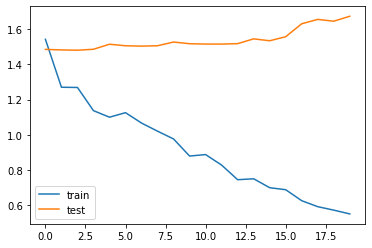

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [32]:
model.evaluate(X_test_subject_1, y_test_one_hot)

2/2 [==============================] - 0s 142ms/step - loss: 1.6927 - acc: 0.2200


[1.6926912069320679, 0.2199999988079071]